# Bike Sharing Assignment



### PROBLEM STATEMENT UNDERSTANDING

  A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.The company is finding it very difficult to sustain in the current market scenario. 
   
  The company wants to create robust business for the future market growth. They  hired a consulting company to understand the factors on which the demand for these shared bikes depends.
  
 
  The company want to know following facts about market:
  
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

### Step-1 Import the necessary libraries

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# import numpy and pandas
import numpy as np
import pandas as pd

#Data visulisation
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step-2 Reading and understanding the data

In [2]:
# Reading the data from the given dataset file
boombikes = pd.read_csv("day.csv")
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Identify No. of rows & columns
boombikes.shape

(730, 16)

In [4]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Overall Stastics of the dataset
boombikes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [6]:
# Identify Null values in the dataset
boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values and the data looks ok.

In [7]:
# Identify Duplicates values in the dataset
boombikes.duplicated().any()

False

- The dataset doesn't have any duplicate values.

### Step-3: Visualize the data and drop the columns that are not relevant to this analysis

In [8]:
boombikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

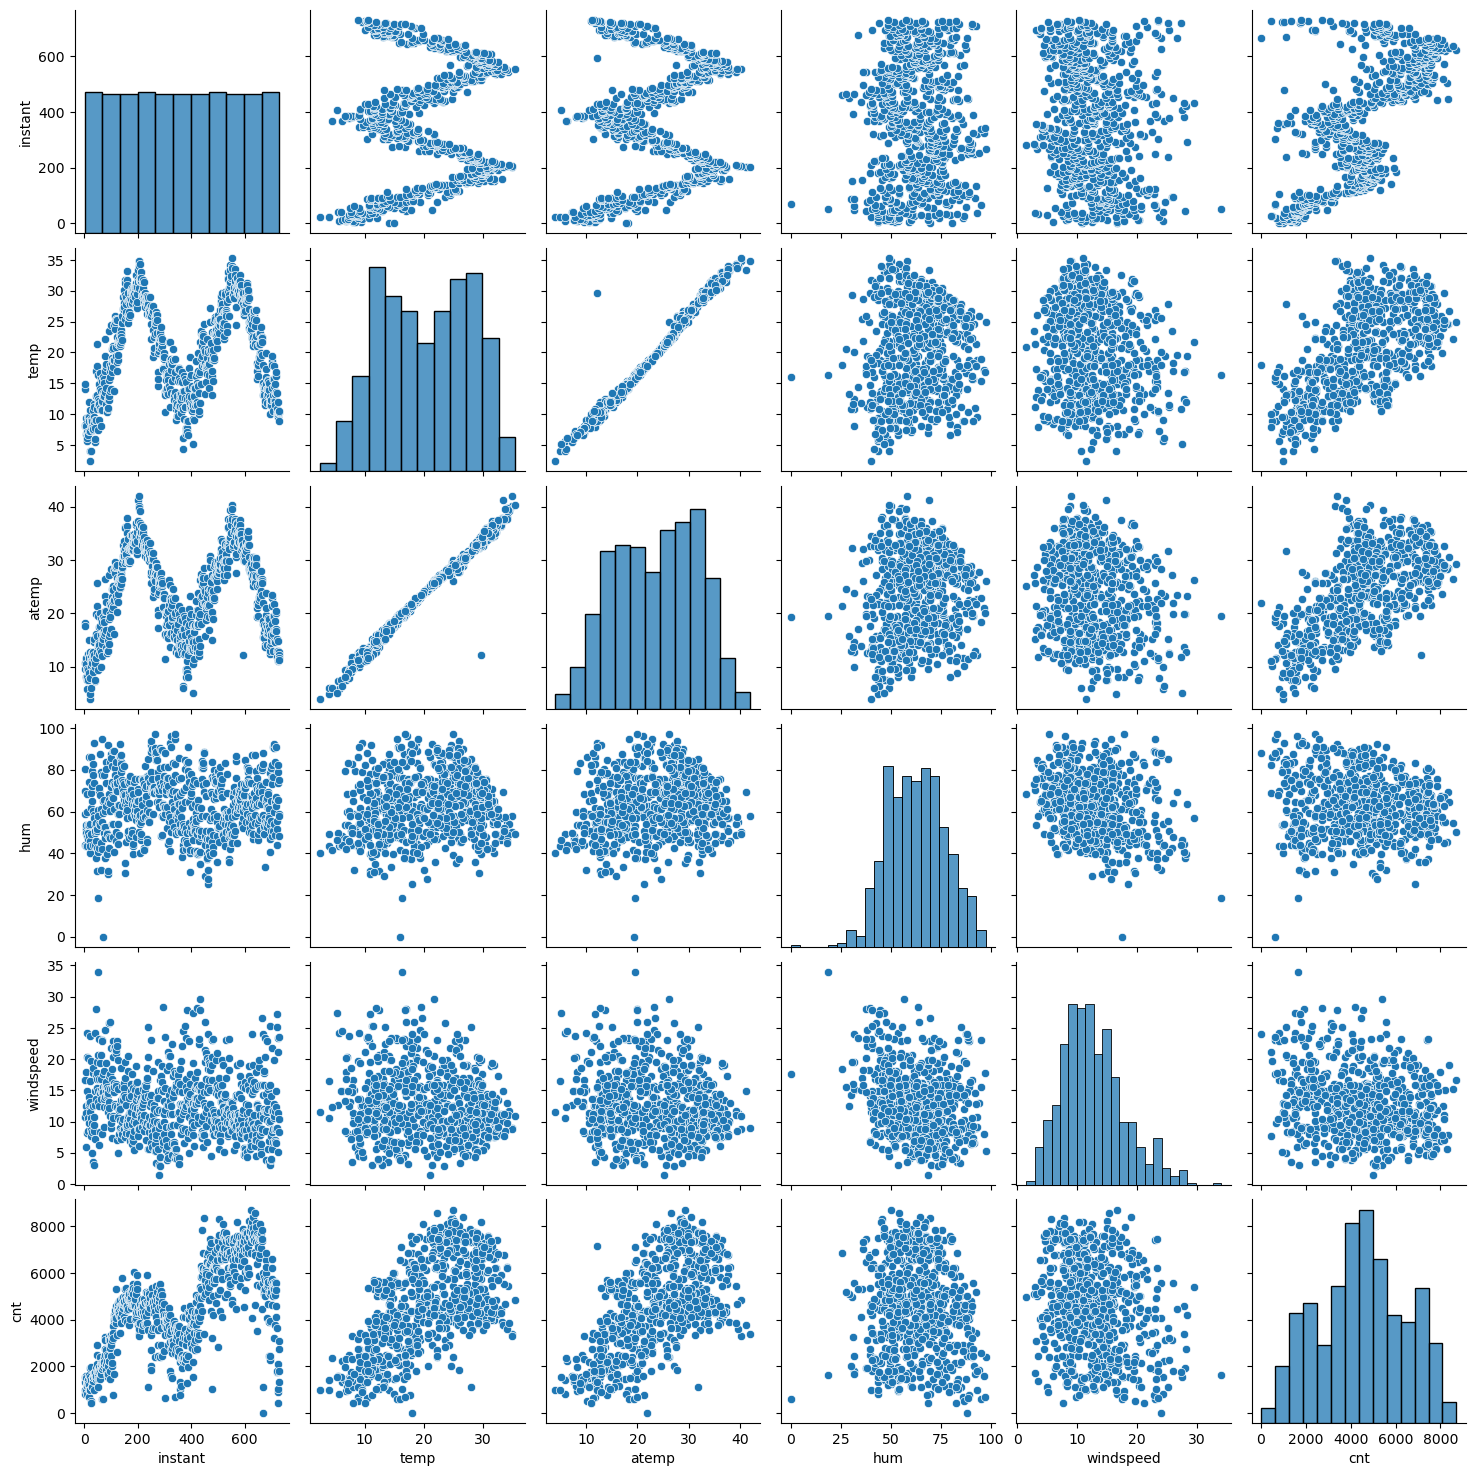

In [9]:
sns.pairplot(boombikes[['instant','temp','atemp','hum','windspeed','cnt']])
plt.show()

In [10]:
# relationship of temp and atemp is identical.
boombikes.drop(['instant','dteday','casual','registered','temp'],inplace=True, axis=1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [11]:
boombikes.shape

(730, 11)

## Step-4: Data preparation

In [12]:
boombikes['mnth']=boombikes['mnth'].map({1:'jan', 2:'feb',3:'mar',4:'apr',5:'may', 6:'jun',7:'jul',8:'aug', 9:'sep',10:'oct',11:'nov', 12:'dec'})
boombikes.mnth.value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [13]:
boombikes['season']=boombikes['season'].map({1: 'spring', 2: 'summer', 3:'fall',4:'winter'})
boombikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [14]:
boombikes['weekday']=boombikes['weekday'].map({6:'sat',0:'sun',1:'mon', 2:'tue',3:'wed',4:'thu', 5:'fri'})
boombikes.weekday.value_counts()

sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64

In [15]:
boombikes['weathersit']=boombikes['weathersit'].map({1: 'clear', 2:'mistcloudy', 3:'lightSnow', 4:'heavyrain'})
boombikes.weathersit.value_counts()

clear         463
mistcloudy    246
lightSnow      21
Name: weathersit, dtype: int64

#### Visualizing Categorical variables

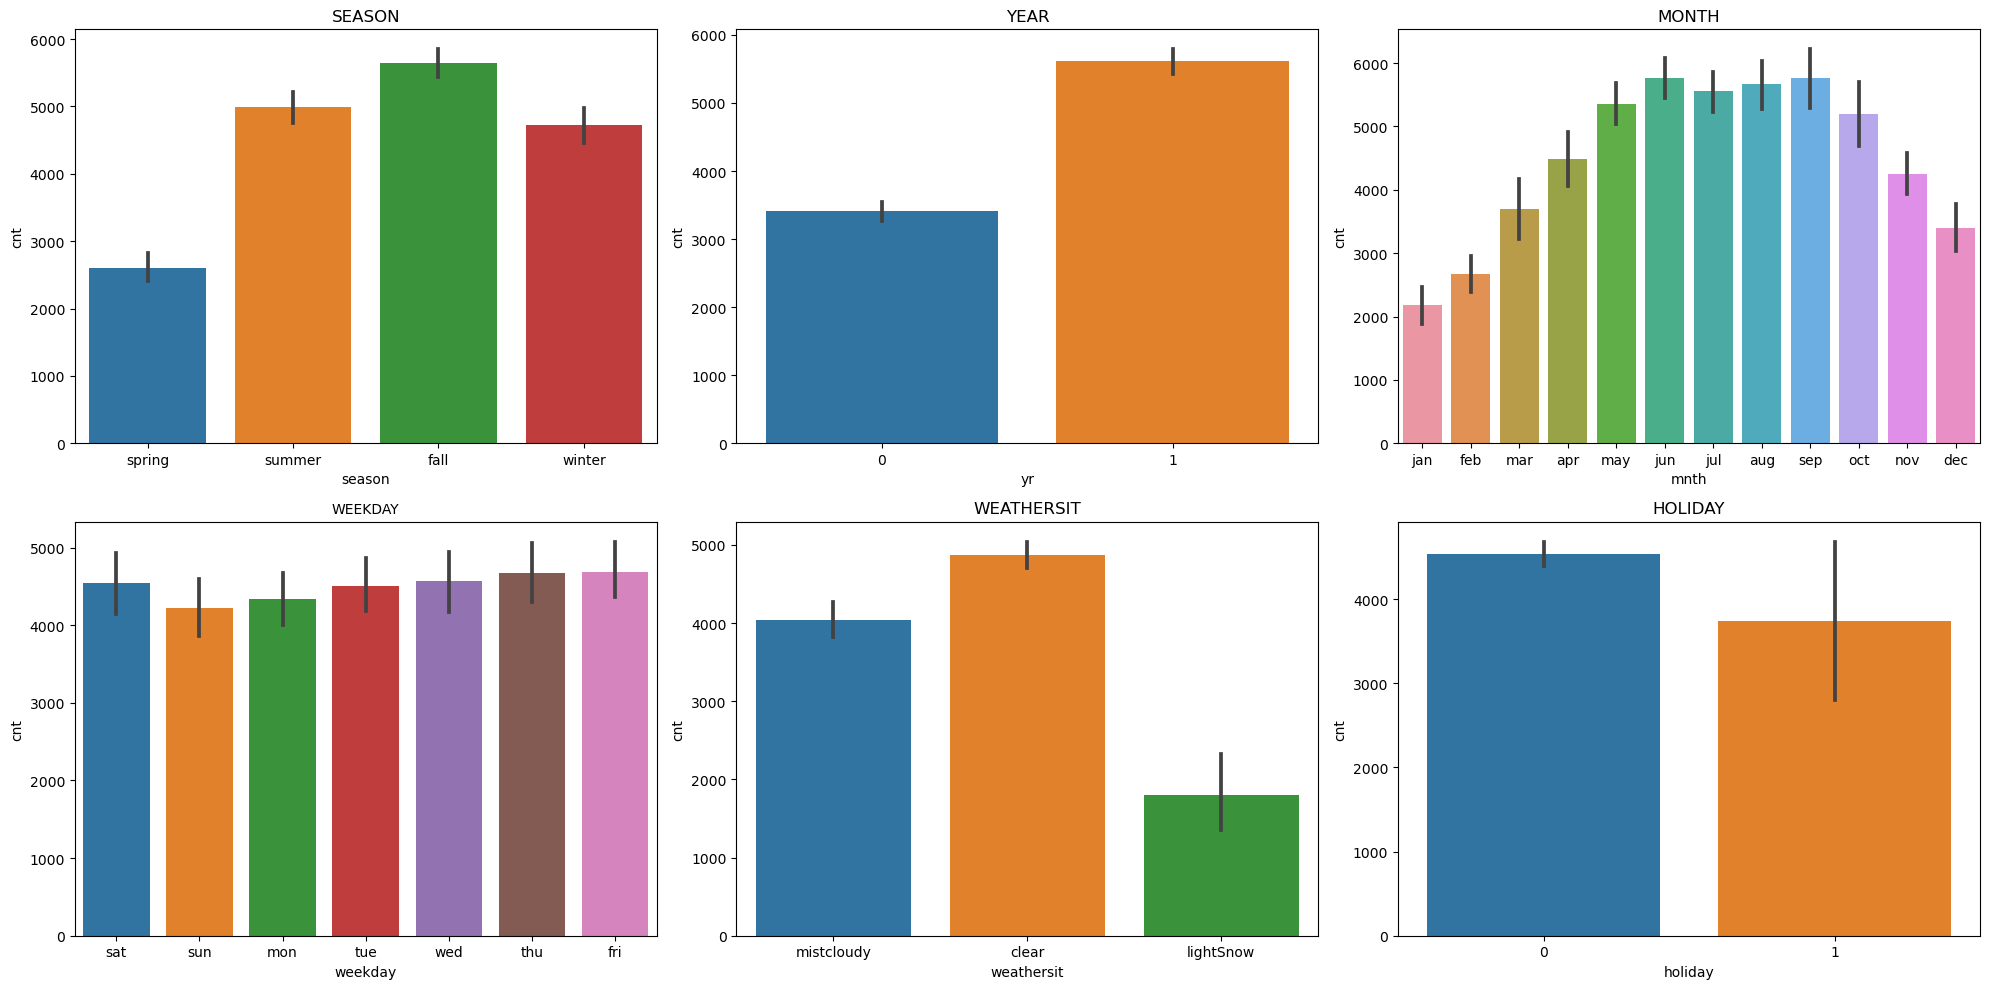

In [16]:
fig, ax =plt.subplots(nrows = 2 , ncols = 3, figsize=(20,10) )



# countplot for season
sns.barplot(data=boombikes, x="season", y='cnt', ax=ax[0,0])
ax[0,0].set_title("season".upper())


# countplot for yr
sns.barplot(data=boombikes, x="yr", y='cnt', ax=ax[0,1])
ax[0,1].set_title("year".upper())


# countplot for mnth
sns.barplot(data=boombikes, x="mnth", y='cnt', ax=ax[0,2])
ax[0,2].set_title("month".upper())



# countplot for weekday
sns.barplot(data=boombikes, x="weekday", y='cnt', ax=ax[1,0])
ax[1,0].set_title("weekday".upper(),fontsize=10)


# countplot for weathersit
sns.barplot(data=boombikes, x="weathersit", y='cnt', ax=ax[1,1])
ax[1,1].set_title("weathersit".upper())


# countplot for holiday
sns.barplot(data=boombikes, x="holiday", y='cnt', ax=ax[1,2])
ax[1,2].set_title("holiday".upper())

# to remove extra info added plt.show()
# plt.subplots_adjust(hspace=0.3) to create extra spaces between  rows
# plt.tight_layout() to adjust spaing between subplot
plt.subplots_adjust(hspace=0.3)
plt.tight_layout() 
plt.show()

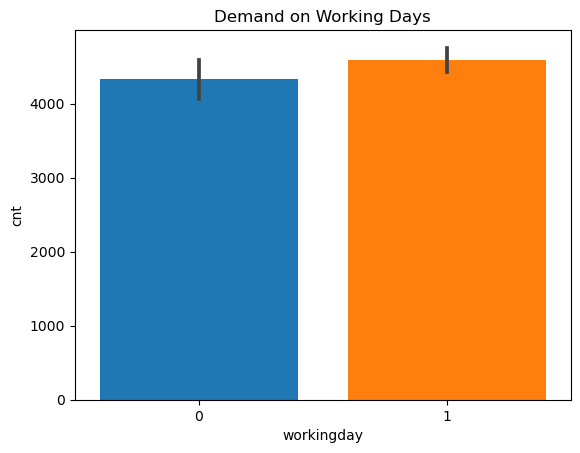

In [70]:
# Demand of  bikes on Working day
sns.barplot(data=boombikes, x="workingday", y="cnt",saturation=1)
plt.title("Demand on Working Days")
plt.show()

Bike demand is higher on working days.

#### Create dummies for the categorical variables

In [17]:
boombikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [18]:
season_dum = pd.get_dummies(boombikes.season, drop_first=True)
season_dum.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [19]:
mnth_dum = pd.get_dummies(boombikes.mnth, drop_first=True)
mnth_dum.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [20]:
weekday_dum = pd.get_dummies(boombikes.weekday, drop_first=True)
weekday_dum.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [21]:
weathersit_dum = pd.get_dummies(boombikes.weathersit, drop_first=True)
weathersit_dum.head()

,lightSnow,mistcloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


#### Now, let us concatinate the dummies into the dataset and drop the columns which were used to create the dummies.

The dummies created are: season_dum, mnth_dum, weekday_dum, weathersit_dum 

In [22]:
boombikes = pd.concat([boombikes,season_dum,mnth_dum, weekday_dum, weathersit_dum], axis=1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
0,spring,0,jan,0,sat,0,mistcloudy,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,mistcloudy,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [23]:
boombikes.shape

(730, 33)

Drop the columns from which the dummies were created.

In [24]:
boombikes.drop(['season','mnth','weathersit','weekday'],axis=1, inplace=True)
boombikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
boombikes.shape

(730, 29)

## Step-5: Splitting the data into training and testing dataset 

In [26]:
df_train, df_test = train_test_split(boombikes, train_size=0.7, test_size=0.3, random_state=50)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [27]:
# Rescaling of data
# 1. Initiate the object
scaler = MinMaxScaler()

# create list of numeric variables
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

#2. fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
707,1,0,0,0.434610,0.933018,0.243629,0.368845,0,0,1,...,0,0,0,0,1,0,0,0,0,1
172,0,0,1,0.858891,0.729068,0.274549,0.515992,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,0,0,0,0.236172,0.513954,0.243603,0.141049,1,0,0,...,0,0,0,1,0,0,0,0,0,1
204,0,0,0,1.000000,0.567625,0.267859,0.412333,0,0,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,0.821838,0.458136,0.150755,0.586401,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Training the model

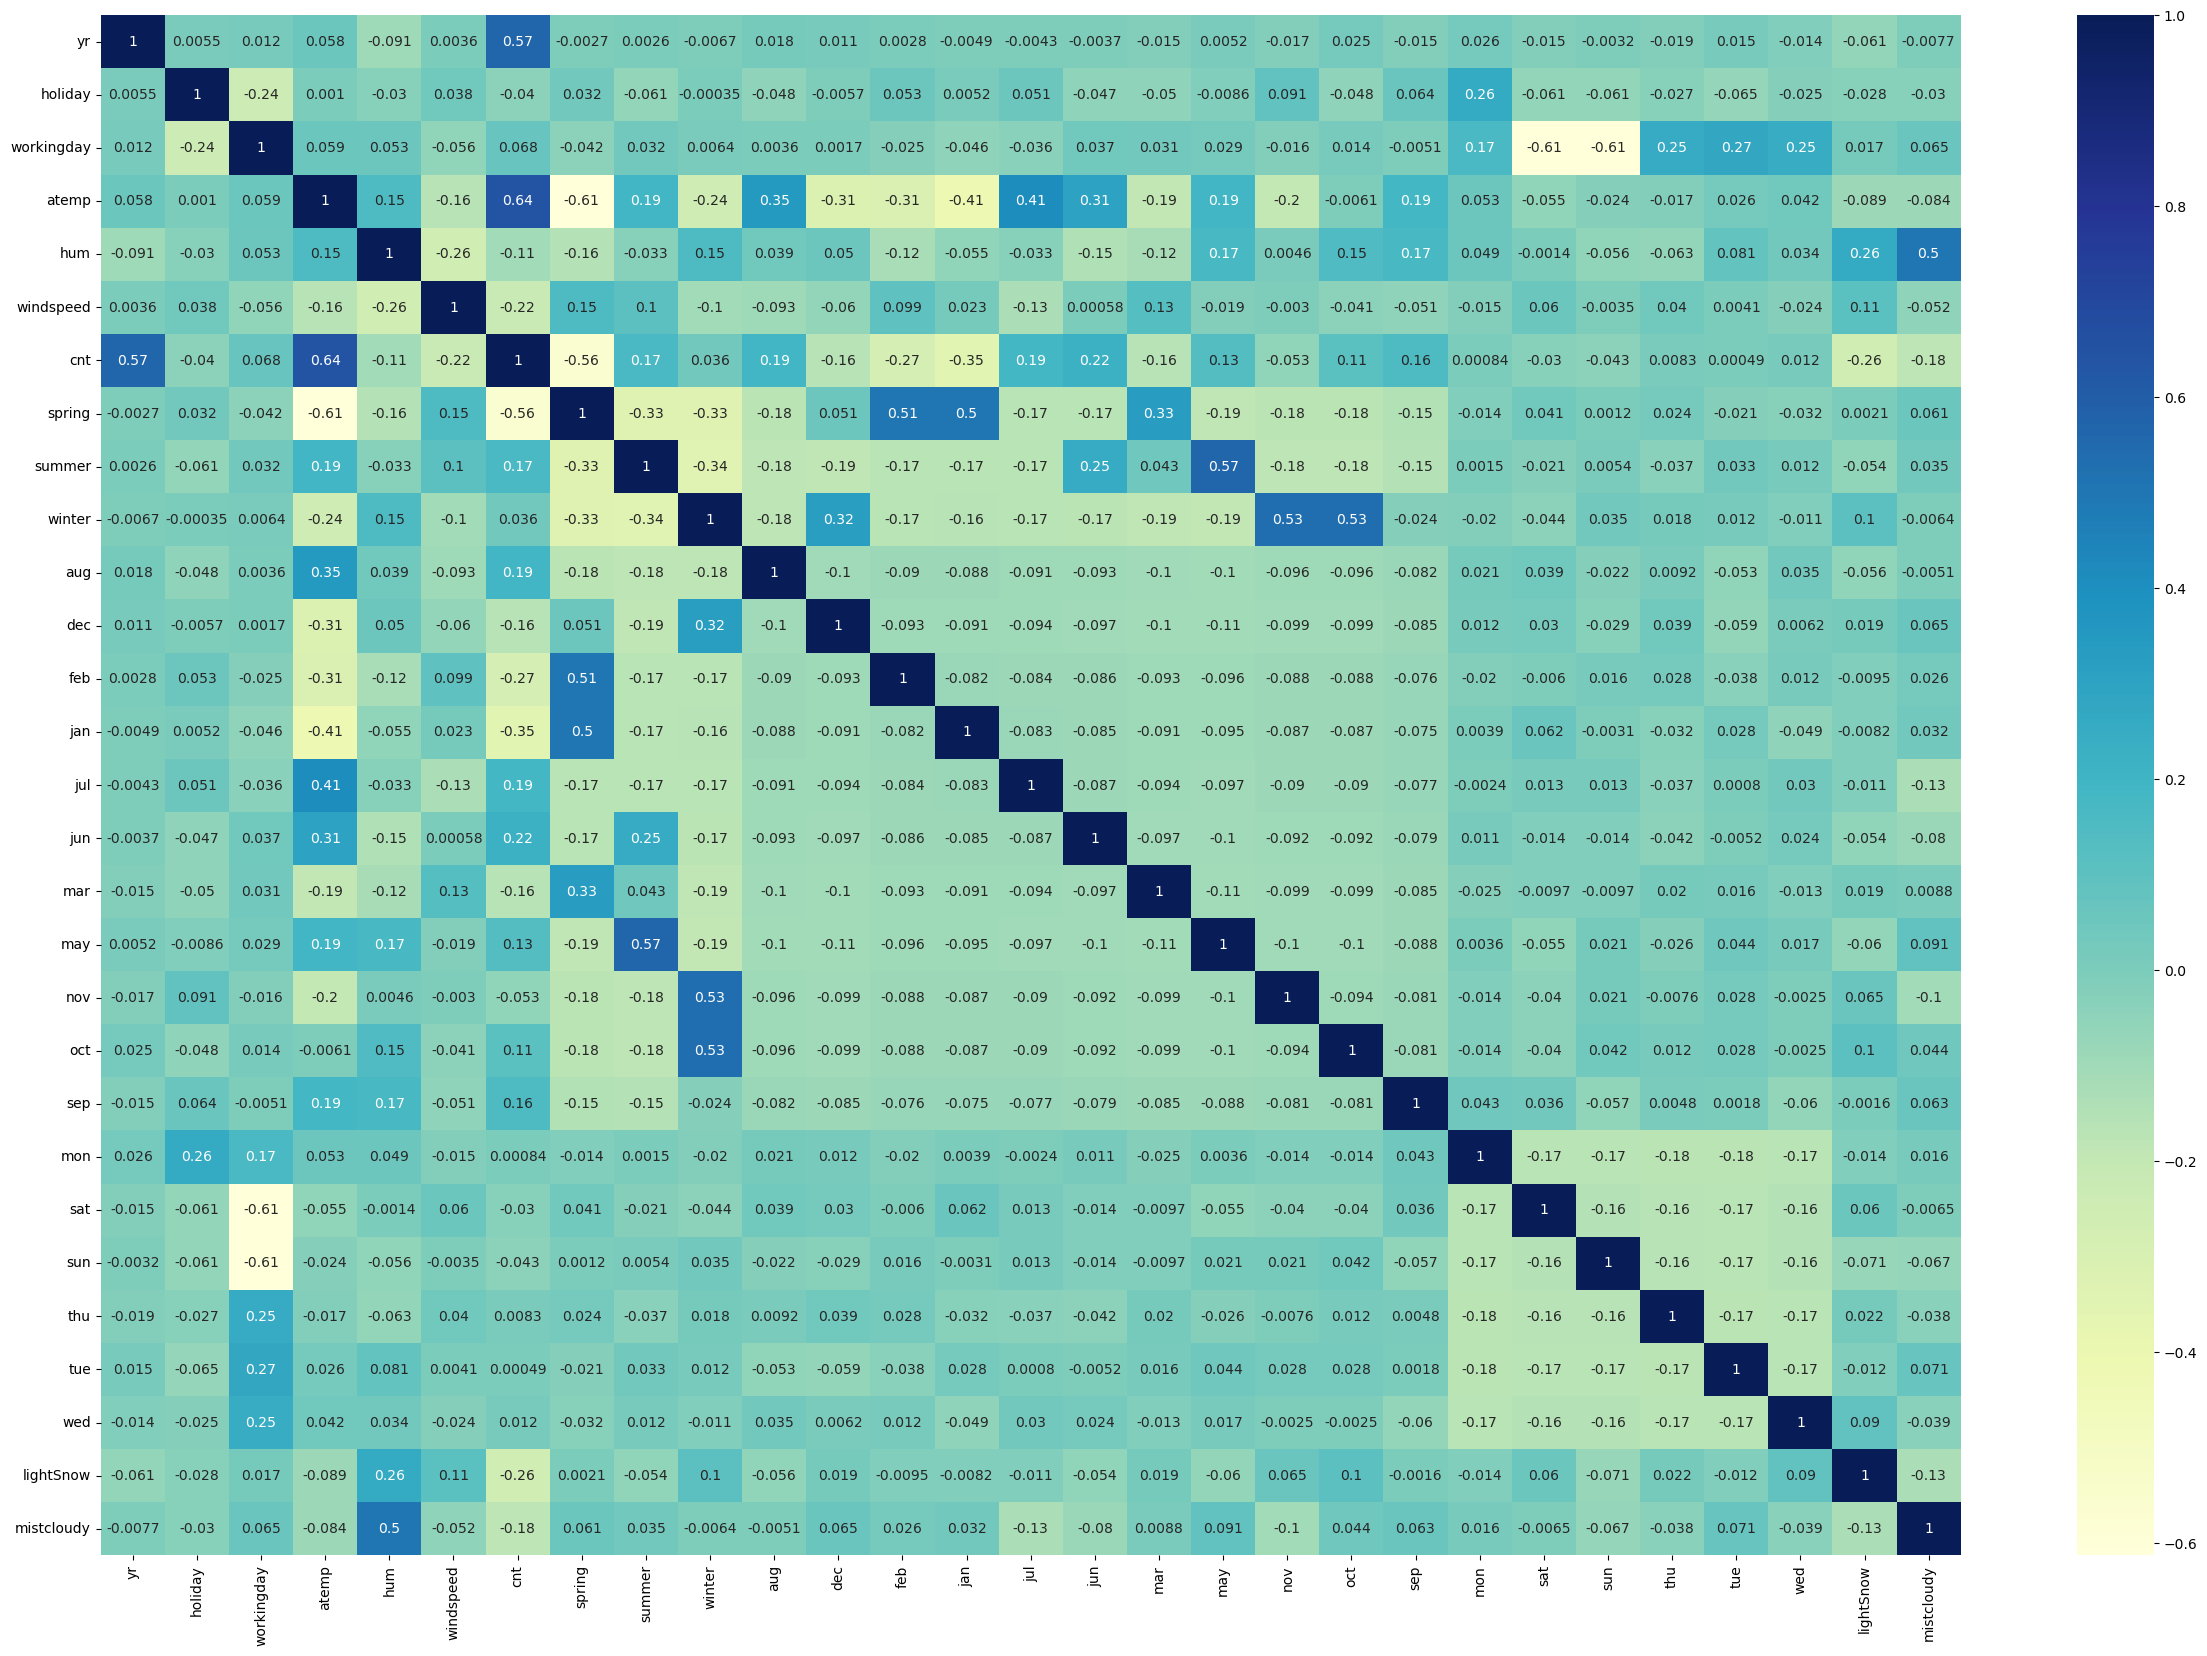

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

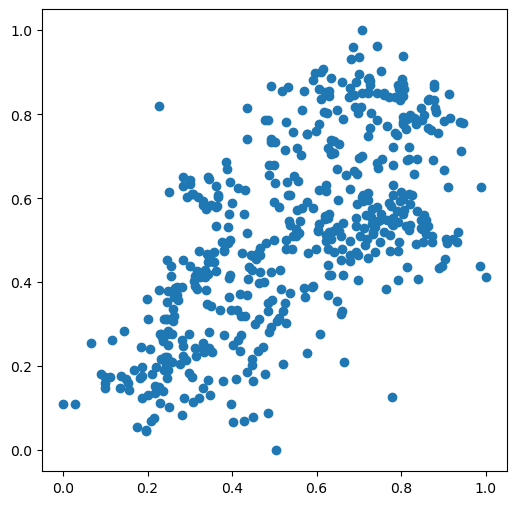

In [30]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [31]:
y_train = df_train.pop('cnt')
y_train.head()

707    0.368845
172    0.515992
14     0.141049
204    0.412333
182    0.586401
Name: cnt, dtype: float64

In [32]:
X_train = df_train
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,aug,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
707,1,0,0,0.434610,0.933018,0.243629,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
172,0,0,1,0.858891,0.729068,0.274549,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,0,0,0,0.236172,0.513954,0.243603,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
204,0,0,0,1.000000,0.567625,0.267859,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,0.821838,0.458136,0.150755,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Step-6: Model selection using Recursive Feature Elimination (RFE)

In [33]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'lightSnow', 'mistcloudy'],
      dtype='object')

#### Running the RFE to arrive at 15 predictor variables

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False, False, False,  True,  True,
       False,  True, False, False,  True, False, False, False,  True,
        True])

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', False, 13),
 ('jun', False, 2),
 ('mar', False, 12),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 4),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 9),
 ('wed', False, 10),
 ('lightSnow', True, 1),
 ('mistcloudy', True, 1)]

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'dec',
       'jan', 'may', 'nov', 'sep', 'sun', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [37]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,spring,winter,dec,jan,may,nov,sep,sun,lightSnow,mistcloudy
707,1,0,0.434610,0.933018,0.243629,0,1,1,0,0,0,0,1,0,1
172,0,0,0.858891,0.729068,0.274549,0,0,0,0,0,0,0,0,0,0
14,0,0,0.236172,0.513954,0.243603,1,0,0,1,0,0,0,0,0,1
204,0,0,1.000000,0.567625,0.267859,0,0,0,0,0,0,0,1,0,0
182,0,0,0.821838,0.458136,0.150755,0,0,0,0,0,0,0,0,0,0


#### Building the model using statsmodel for detailed statistics and manual elimination to arrive at a good fit

In [38]:
# Adding a constant variable  
X_train_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.32e-191
Time:                        21:52:31   Log-Likelihood:                 522.57
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     494   BIC:                            -945.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4052      0.031     13.046      0.0

In [39]:
def vif(X_train_new):
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [40]:
vif(X_train_rfe)

,Features,VIF
3,hum,28.34
2,atemp,16.12
4,windspeed,4.03
6,winter,3.24
5,spring,3.15
14,mistcloudy,2.42
0,yr,1.95
10,nov,1.86
7,dec,1.60
8,jan,1.57


In [41]:
X_train_rfe.drop('hum', inplace=True, axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter', 'dec', 'jan',
       'may', 'nov', 'sep', 'sun', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [42]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.43e-185
Time:                        21:52:31   Log-Likelihood:                 506.02
No. Observations:                 510   AIC:                            -982.0
Df Residuals:                     495   BIC:                            -918.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3040      0.026     11.507      0.000       0.252       0.356
yr             0.2383      0.008     29.341      0.000       0.222       0.254
holiday       -0.0615      0.027     -2.276      0.023      -0.115      -0.008
atemp          0.3660      0.032     11.597      0.000       0.304       0.428
windspeed     -0.1297      0.025     -5.144      0.000      -0.179      -0.080
spring        -0.1197      0.016     -7.423      0.000      -0.151      -0.088
winter         0.0709      0.015      4.867      0.000       0.042       0.100
dec           -0.0679      0.017     -4.023      0.000      -0.101      -0.035
jan           -0.0559      0.019     -2.999      0.003      -0.092      -0.019
may            0.0187      0.015      1.280      0.201      -0.010       0.047
nov           -0.0735      0.019     -3.884      0.000      -0.111      -0.036
sep            0.0458      0.017      2.674      0.008       0.012       0.079
sun           -0.0425      0.012     -3.562      0.000      -0.066      -0.019
lightSnow     -0.2733      0.024    -11.464      0.000      -0.320      -0.226
mistcloudy    -0.0818      0.009     -9.275      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       85.026   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.402
Skew:                          -0.740   Prob(JB):                     3.20e-64
Kurtosis:                       6.402   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif(X_train_rfe)

,Features,VIF
3,windspeed,4.03
2,atemp,3.98
5,winter,2.63
4,spring,2.27
0,yr,1.95
9,nov,1.81
13,mistcloudy,1.58
6,dec,1.51
7,jan,1.48
8,may,1.27


In [44]:
X_train_rfe.drop('may', inplace=True, axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter', 'dec', 'jan',
       'nov', 'sep', 'sun', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [45]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.25e-186
Time:                        21:52:31   Log-Likelihood:                 505.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     496   BIC:                            -923.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3099      0.026     11.905      0.000       0.259       0.361
yr             0.2384      0.008     29.332      0.000       0.222       0.254
holiday       -0.0607      0.027     -2.247      0.025      -0.114      -0.008
atemp          0.3629      0.031     11.525      0.000       0.301       0.425
windspeed     -0.1302      0.025     -5.162      0.000      -0.180      -0.081
spring        -0.1248      0.016     -7.983      0.000      -0.156      -0.094
winter         0.0666      0.014      4.695      0.000       0.039       0.095
dec           -0.0688      0.017     -4.073      0.000      -0.102      -0.036
jan           -0.0564      0.019     -3.027      0.003      -0.093      -0.020
nov           -0.0741      0.019     -3.912      0.000      -0.111      -0.037
sep            0.0424      0.017      2.506      0.013       0.009       0.076
sun           -0.0420      0.012     -3.522      0.000      -0.065      -0.019
lightSnow     -0.2737      0.024    -11.477      0.000      -0.321      -0.227
mistcloudy    -0.0805      0.009     -9.183      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       84.709   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.002
Skew:                          -0.749   Prob(JB):                     9.57e-62
Kurtosis:                       6.314   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif(X_train_rfe)

,Features,VIF
3,windspeed,4.01
2,atemp,3.84
5,winter,2.55
4,spring,2.20
0,yr,1.95
8,nov,1.81
12,mistcloudy,1.54
6,dec,1.51
7,jan,1.48
10,sun,1.17


In [47]:
X_train_rfe.drop('holiday', inplace=True, axis=1)
X_train_rfe.columns

Index(['yr', 'atemp', 'windspeed', 'spring', 'winter', 'dec', 'jan', 'nov',
       'sep', 'sun', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [48]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.84e-186
Time:                        21:52:31   Log-Likelihood:                 502.60
No. Observations:                 510   AIC:                            -979.2
Df Residuals:                     497   BIC:                            -924.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3124      0.026     11.960      0.000       0.261       0.364
yr             0.2384      0.008     29.214      0.000       0.222       0.254
atemp          0.3587      0.032     11.367      0.000       0.297       0.421
windspeed     -0.1327      0.025     -5.245      0.000      -0.182      -0.083
spring        -0.1272      0.016     -8.119      0.000      -0.158      -0.096
winter         0.0672      0.014      4.718      0.000       0.039       0.095
dec           -0.0705      0.017     -4.165      0.000      -0.104      -0.037
jan           -0.0568      0.019     -3.037      0.003      -0.094      -0.020
nov           -0.0793      0.019     -4.201      0.000      -0.116      -0.042
sep            0.0394      0.017      2.326      0.020       0.006       0.073
sun           -0.0404      0.012     -3.379      0.001      -0.064      -0.017
lightSnow     -0.2716      0.024    -11.351      0.000      -0.319      -0.225
mistcloudy    -0.0799      0.009     -9.087      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       86.102   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.192
Skew:                          -0.775   Prob(JB):                     2.88e-60
Kurtosis:                       6.241   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif(X_train_rfe)

,Features,VIF
2,windspeed,4.00
1,atemp,3.83
4,winter,2.55
3,spring,2.19
0,yr,1.95
7,nov,1.78
11,mistcloudy,1.54
5,dec,1.51
6,jan,1.48
9,sun,1.17


In [50]:
X_train_rfe.drop('sep', inplace=True, axis=1)
X_train_rfe.columns

Index(['yr', 'atemp', 'windspeed', 'spring', 'winter', 'dec', 'jan', 'nov',
       'sun', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [51]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.74e-186
Time:                        21:52:31   Log-Likelihood:                 499.84
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     498   BIC:                            -924.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3132      0.026     11.942      0.000       0.262       0.365
yr             0.2380      0.008     29.043      0.000       0.222       0.254
atemp          0.3635      0.032     11.490      0.000       0.301       0.426
windspeed     -0.1339      0.025     -5.267      0.000      -0.184      -0.084
spring        -0.1290      0.016     -8.209      0.000      -0.160      -0.098
winter         0.0685      0.014      4.791      0.000       0.040       0.097
dec           -0.0733      0.017     -4.320      0.000      -0.107      -0.040
jan           -0.0568      0.019     -3.021      0.003      -0.094      -0.020
nov           -0.0829      0.019     -4.389      0.000      -0.120      -0.046
sun           -0.0419      0.012     -3.490      0.001      -0.065      -0.018
lightSnow     -0.2706      0.024    -11.263      0.000      -0.318      -0.223
mistcloudy    -0.0785      0.009     -8.908      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       86.555   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.221
Skew:                          -0.769   Prob(JB):                     1.92e-62
Kurtosis:                       6.318   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif(X_train_rfe)

,Features,VIF
2,windspeed,4.00
1,atemp,3.70
4,winter,2.54
3,spring,2.18
0,yr,1.95
7,nov,1.77
10,mistcloudy,1.53
5,dec,1.50
6,jan,1.48
8,sun,1.16


In [53]:
y_train_pred = lm.predict(X_train_sm)
y_train_pred.head()

707    0.551366
172    0.588660
14     0.102129
204    0.598960
182    0.591763
dtype: float64

#### Residual Analysis of the train data

Let us check if the error terms are also normally distributed 

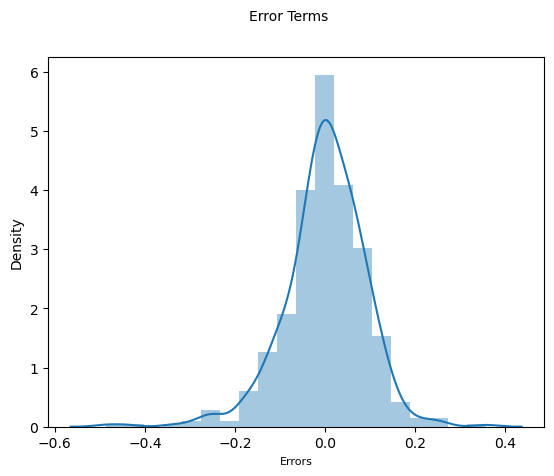

In [54]:
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot(res, bins=20)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 8)                         # X-label
plt.show()

#### Homoscedasticity

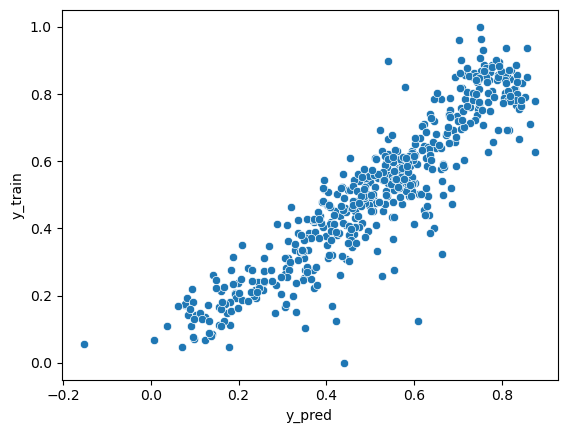

In [72]:
sns.scatterplot(x=y_train_pred,y=y_train)
plt.xlabel('y_pred')
plt.ylabel('y_train')

plt.show()

The plot show an almost constant variance of prediction and thus the error validating the assumption of Homoscedasticity.

#### No autocorrelation of residuals

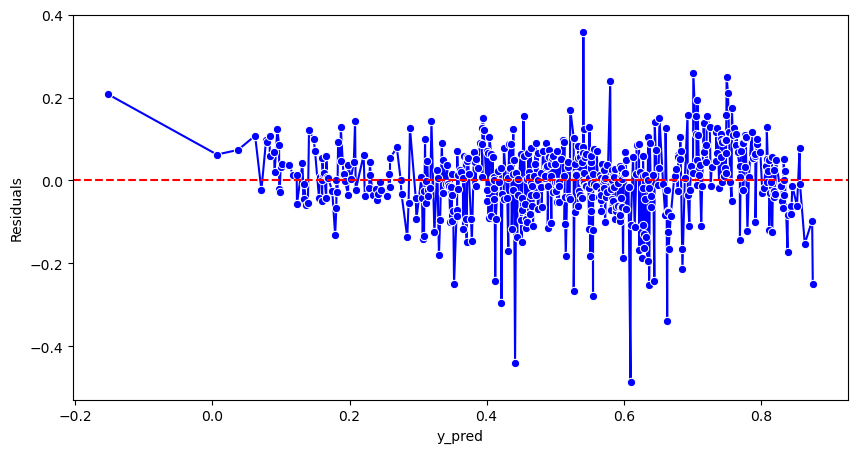

In [56]:
plt.figure(figsize=(10,5))
sns.lineplot(x=y_train_pred,y=res,marker='o',color='blue')
plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

The error terms are not forming any pattern and hence the model is good.

## Step-7: Apply the model on the test data set and validate the model robustness

In [57]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.630137,24.352629,63.176904,12.495316,4627.598174,0.251142,0.246575,0.223744,...,0.082192,0.123288,0.123288,0.164384,0.164384,0.136986,0.123288,0.146119,0.022831,0.324201
std,0.499633,0.198967,0.483873,8.505412,13.605548,5.239795,1924.239131,0.434663,0.432005,0.417707,...,0.275286,0.329520,0.329520,0.371472,0.371472,0.344621,0.329520,0.354034,0.149707,0.469148
min,0.000000,0.000000,0.000000,5.082900,30.217400,1.500244,801.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,17.729100,53.520800,8.750468,3362.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,25.599150,62.217400,11.958361,4590.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,31.219275,72.625000,15.639274,6168.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,27.833743,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
X_test = df_test.copy(deep=True)
X_test.shape

(219, 29)

In [59]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [60]:
X_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.630137,24.352629,63.176904,12.495316,4627.598174,0.251142,0.246575,0.223744,...,0.082192,0.123288,0.123288,0.164384,0.164384,0.136986,0.123288,0.146119,0.022831,0.324201
std,0.499633,0.198967,0.483873,8.505412,13.605548,5.239795,1924.239131,0.434663,0.432005,0.417707,...,0.275286,0.329520,0.329520,0.371472,0.371472,0.344621,0.329520,0.354034,0.149707,0.469148
min,0.000000,0.000000,0.000000,5.082900,30.217400,1.500244,801.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,17.729100,53.520800,8.750468,3362.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,25.599150,62.217400,11.958361,4590.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,31.219275,72.625000,15.639274,6168.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,27.833743,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Apply the scaling on the test data set

In [61]:
X_test[num_vars] = scaler.transform(df_test[num_vars])
X_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.630137,0.570000,0.651028,0.305357,0.529866,0.251142,0.246575,0.223744,...,0.082192,0.123288,0.123288,0.164384,0.164384,0.136986,0.123288,0.146119,0.022831,0.324201
std,0.499633,0.198967,0.483873,0.237661,0.140203,0.169255,0.221380,0.434663,0.432005,0.417707,...,0.275286,0.329520,0.329520,0.371472,0.371472,0.344621,0.329520,0.354034,0.149707,0.469148
min,0.000000,0.000000,0.000000,0.031559,0.311386,-0.049804,0.089623,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.384923,0.551524,0.184392,0.384261,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.604831,0.641141,0.288013,0.525541,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.761870,0.748390,0.406913,0.707087,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.064361,1.002146,0.800818,0.981707,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X & y 

In [62]:
y_test = X_test.pop('cnt')
y_test

333    0.413139
203    0.375403
279    0.570985
483    0.722734
267    0.573861
         ...   
168    0.586401
574    0.756443
535    0.712034
290    0.543718
43     0.180281
Name: cnt, Length: 219, dtype: float64

In [63]:
train_col_lst = X_train_rfe.columns.to_list()
train_col_lst

['yr',
 'atemp',
 'windspeed',
 'spring',
 'winter',
 'dec',
 'jan',
 'nov',
 'sun',
 'lightSnow',
 'mistcloudy']

In [64]:
X_test = X_test[train_col_lst]
X_test.head()

,yr,atemp,windspeed,spring,winter,dec,jan,nov,sun,lightSnow,mistcloudy
333,0,0.324343,0.488582,0,1,0,0,1,0,0,0
203,0,1.013214,0.185727,0,0,0,0,0,0,0,0
279,0,0.594242,-0.049804,0,1,0,0,0,0,0,0
483,1,0.518402,0.154750,0,0,0,0,0,1,0,0
267,0,0.689572,0.010767,0,1,0,0,0,1,0,1


In [65]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,atemp,windspeed,spring,winter,dec,jan,nov,sun,lightSnow,mistcloudy
333,1.0,0,0.324343,0.488582,0,1,0,0,1,0,0,0
203,1.0,0,1.013214,0.185727,0,0,0,0,0,0,0,0
279,1.0,0,0.594242,-0.049804,0,1,0,0,0,0,0,0
483,1.0,1,0.518402,0.154750,0,0,0,0,0,1,0,0
267,1.0,0,0.689572,0.010767,0,1,0,0,0,1,0,1


In [66]:
y_test_pred = lm.predict(X_test_sm)
y_test_pred.head()

333    0.351343
203    0.656641
279    0.604399
483    0.677028
267    0.510536
dtype: float64

### Model evaluation

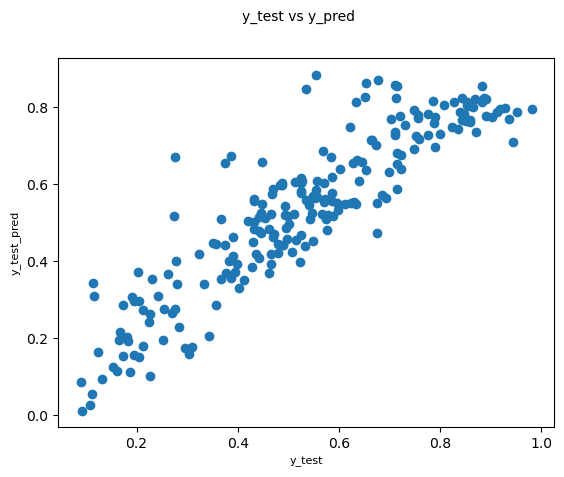

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=10)
plt.xlabel('y_test', fontsize=8)
plt.ylabel('y_test_pred', fontsize=8)
plt.show()

<Axes: ylabel='Density'>

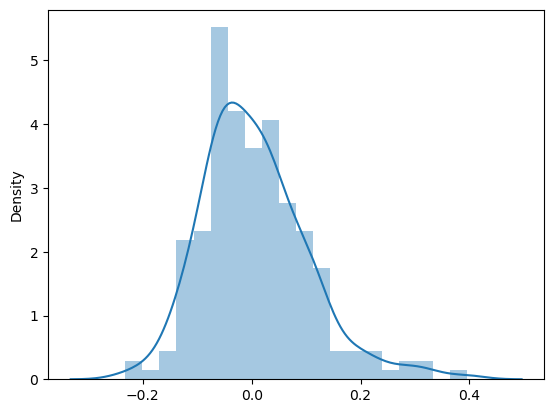

In [68]:
sns.distplot(y_test_pred-y_test,bins=20)

### Checking the r square for the train and test data using the final model. 

In [69]:
print("r-square for train dataset:",r2_score(y_train, y_train_pred))
print("r-square for test dataset:",r2_score(y_test, y_test_pred))

r-square for train dataset: 0.8344604678146822
r-square for test dataset: 0.80397172473359


As we see that the difference between the train and test data is less, the model arrived is a decent model.

We can see that the equation of our best fitted line is:

$ cnt = 0.3132 + 0.2380 \times  yr  + 0.3635 \times atemp - 0.1339  \times windspeed - 0.1290 \times spring + 0.0685 \times winter - 0.0733 \times dec - 0.0568 \times jan - 0.0829 \times nov - 0.0419 \times sun - 0.2706 \times lightsnow  - 0.0785\times mistcloudy $
